In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

df = pd.read_csv('/content/tweets.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


Importing the dependencies

In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Processing

In [7]:
# loading the file from csv file to pandas dataframe
twitter_data = pd.read_csv('/content/tweets.csv', encoding = 'ISO-8859-1')

In [8]:
# Checking the number of rows and columns
twitter_data.shape

(7920, 3)

In [9]:
# printing the first few rows of dataframe
twitter_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [10]:
# Names of columns and loading dataset again

column_names = ['id', 'label', 'tweet']
twitter_data = pd.read_csv('/content/tweets.csv', names = column_names, encoding='ISO-8859-1')

In [11]:
twitter_data.shape

(7921, 3)

In [12]:
twitter_data.head()

,id,label,tweet
0,id,label,tweet
1,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,2,0,Finally a transparant silicon case ^^ Thanks t...
3,3,0,We love this! Would you go? #talk #makememorie...
4,4,0,I'm wired I know I'm George I was made that wa...


**Data Pre-Processing**

In [13]:
# Finding the number of misiing values
twitter_data.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [14]:
# Since there are no null values we move onto next step

In [15]:
# Viewing the target column
twitter_data['label'].value_counts()

0        5894
1        2026
label       1
Name: label, dtype: int64

**0 --> Positive Tweet**

  **1 --> Negative Tweet**

**Stemming**

In [16]:
# Stemming is the process of reducing a word to its Root Word

In [17]:
port_stem = PorterStemmer()

In [18]:
# Stemming()
def stemming(content):

  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english') ]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [19]:
twitter_data['stemmed_content'] = twitter_data['tweet'].apply(stemming)

In [20]:
twitter_data.head()

,id,label,tweet,stemmed_content
0,id,label,tweet,tweet
1,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnanc test http goo gl h mfqv a...
2,2,0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl yay son...
3,3,0,We love this! Would you go? #talk #makememorie...,love would go talk makememori unplug relax iph...
4,4,0,I'm wired I know I'm George I was made that wa...,wire know georg made way iphon cute daventri h...


In [21]:
print(twitter_data['stemmed_content'])

0                                                   tweet
1       fingerprint pregnanc test http goo gl h mfqv a...
2       final transpar silicon case thank uncl yay son...
3       love would go talk makememori unplug relax iph...
4       wire know georg made way iphon cute daventri h...
                              ...                        
7916    live loud lol liveoutloud selfi smile soni mus...
7917    would like wish amaz day make everi minut coun...
7918    help love year old neighbor ipad morn made rea...
7919    final got smart pocket wifi stay connect anyti...
7920    appl barcelona appl store bcn barcelona travel...
Name: stemmed_content, Length: 7921, dtype: object


In [22]:
print(twitter_data['label'])

0       label
1           0
2           0
3           0
4           0
        ...  
7916        0
7917        0
7918        0
7919        0
7920        0
Name: label, Length: 7921, dtype: object


In [23]:
# Seperating data and the label

x = twitter_data['stemmed_content'].values
y = twitter_data['label'].values

In [24]:
print(x)

['tweet'
 'fingerprint pregnanc test http goo gl h mfqv android app beauti cute health iger iphoneonli iphonesia iphon'
 'final transpar silicon case thank uncl yay soni xperia sonyexperia http instagram com p yget jc jm'
 ... 'help love year old neighbor ipad morn made realis actual need pad'
 'final got smart pocket wifi stay connect anytim anywher ipad samsung gadget http instagr p u g vju'
 'appl barcelona appl store bcn barcelona travel iphon selfi fli fun cabincrew http instagram com p wbapvzpcl']


In [25]:
print(y)

['label' '0' '0' ... '0' '0' '0']


Splitting the data to Training and Testing data

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [27]:
print(x.shape, x_train.shape, x_test.shape)

(7921,) (6336,) (1585,)


In [28]:
print(x_test)

['definit driver licens whath bear driver drive news photographi video art iphon photo new followm blog instagram inspir today motiv life japan beauti natur work fun http ift tt dildjd pic twitter com qajcwjtelv'
 'new babi laptop pink gadget babi soni vaio instaday instagood instadaili http instagram com p x iyvnlljl'
 'eric ona sk haha thought hahahahahah' ...
 'best game crash bandicoot naughti dog game psone playstat soni http instagram com p wamji'
 'justinbieb appl ipad iphon june amjun via followbacg'
 'word fuck still turn duck iphon swear fuck know better pottymouth']


In [29]:
# Converting the textual data to numerical data

vectorizer = TfidfVectorizer()

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [30]:
print(x_train)

  (0, 16623)	0.3235140827367684
  (0, 10897)	0.38790396354414075
  (0, 2764)	0.08152979033097113
  (0, 15081)	0.12130229145812929
  (0, 11239)	0.1526568108976228
  (0, 12791)	0.12063140262218959
  (0, 13081)	0.23449273762404768
  (0, 5096)	0.19432521012601855
  (0, 2270)	0.25367277353449896
  (0, 5088)	0.18458665819692338
  (0, 14108)	0.25367277353449896
  (0, 14082)	0.2555757631677109
  (0, 13518)	0.38790396354414075
  (0, 14984)	0.2082208343955583
  (0, 9324)	0.2527520882068923
  (0, 6473)	0.06881535711062464
  (0, 7016)	0.10026154761440594
  (0, 2271)	0.2555757631677109
  (0, 4823)	0.1643038469369584
  (1, 204)	0.47552363898728367
  (1, 10042)	0.47552363898728367
  (1, 11664)	0.25447041706883783
  (1, 588)	0.11173311995435935
  (1, 15412)	0.2533169600494262
  (1, 5337)	0.2134466286613722
  :	:
  (6334, 5311)	0.26411660781334145
  (6334, 4562)	0.22693904551378896
  (6334, 4455)	0.20268364077090556
  (6334, 5523)	0.23590547803101566
  (6334, 15216)	0.22214100370306603
  (6334, 3264)	0

In [31]:
print(x_test)

  (0, 16287)	0.13567219389991672
  (0, 15616)	0.17696907342578772
  (0, 15081)	0.08986744141345375
  (0, 14984)	0.15426150166802355
  (0, 14759)	0.13411843791098751
  (0, 11239)	0.11309660225538477
  (0, 11204)	0.13488580216253396
  (0, 11189)	0.12899556462299688
  (0, 10096)	0.13744603367650265
  (0, 10050)	0.09819802653776277
  (0, 9934)	0.1666479195493374
  (0, 9638)	0.22347567684813052
  (0, 8466)	0.12505750553368686
  (0, 7440)	0.21597832894027774
  (0, 7166)	0.056563272627560765
  (0, 7016)	0.07427929553474227
  (0, 6958)	0.21132862746325692
  (0, 6687)	0.1688361095511441
  (0, 6473)	0.050982219702087155
  (0, 5088)	0.13675199777197225
  (0, 4827)	0.1728561888580907
  (0, 3763)	0.5307934333646201
  (0, 3759)	0.22142876180254742
  (0, 3338)	0.2745208917031609
  (0, 2764)	0.06040177450851191
  :	:
  (1582, 9946)	0.505856721986891
  (1582, 7016)	0.1307488001776621
  (1582, 6473)	0.08974053951984602
  (1582, 5208)	0.5105317907398874
  (1582, 3624)	0.3250483330634642
  (1582, 3002)	0.

**Training the machine learning model**

**Logistic Regression**

In [32]:
model = LogisticRegression(max_iter=1000)


In [33]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

**Accuracy Score**

In [34]:
# accuracy score on the training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [35]:
print('Accuracy score on Training data: ', training_data_accuracy)

Accuracy score on Training data:  0.9494949494949495


In [36]:
# accuracy score on the testing data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [37]:
print('Accuracy score on Testing data: ', test_data_accuracy)

Accuracy score on Testing data:  0.886435331230284


**Model Accuracy = 88.6%**

**Saving the Trained model**

In [38]:
import pickle

In [39]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [40]:
# Using the saved model for future predictions



In [41]:
# loading the saved model
loaded_model = pickle.load(open('/content/trained_model.sav', 'rb'))

In [42]:
x_new = x_test[200]
print(y_test[200])

prediction = model.predict(x_new)
print(prediction)

if (prediction[0] == 0):
  print('Positive Tweet')

else:
  print('Negative Tweet')

0
['0']
Negative Tweet


**OR**

In [43]:
import pandas as pd

In [44]:
# Dataset imported
df = pd.read_csv('/content/tweets.csv',names =['id','label','tweet'])

In [45]:
df.reset_index(inplace = True, drop = True)

In [46]:
df

,id,label,tweet
0,id,label,tweet
1,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,2,0,Finally a transparant silicon case ^^ Thanks t...
3,3,0,We love this! Would you go? #talk #makememorie...
4,4,0,I'm wired I know I'm George I was made that wa...
...,...,...,...
7916,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,7917,0,We would like to wish you an amazing day! Make...
7918,7918,0,Helping my lovely 90 year old neighbor with he...
7919,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [47]:
pd.set_option('display.max_colwidth', None)

In [48]:
df.head()

,id,label,tweet
0,id,label,tweet
1,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
2,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
3,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
4,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/


In [49]:
df['label'].unique()     # Checking number of types of comment

array(['label', '0', '1'], dtype=object)

**0 --> Positive Tweet**

  **1 --> Negative Tweet**

**Data Pre-Processing**

In [50]:
# Remove Punctuation function
import string
def remove_punc(text):
  punc_free = ''.join(i for i in text if i not in string.punctuation)
  return punc_free

In [51]:
#  Tokenization function
import nltk
nltk.download('punkt')
def tokenization(text):
  words = nltk.word_tokenize(text)
  return words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [52]:
# Remove Stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
  output = [i for i in text if i not in stopwords]
  return output

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lem = WordNetLemmatizer()
def lemm(text):
  lemm_text = [wordnet_lem.lemmatize(word) for word in text]
  return lemm_text

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [54]:
def preprocess(df_col):
  corpus = []
  for item in df_col:
    new_item = remove_punc(item)
    new_item = new_item.lower()
    new_item = tokenization(new_item)
    new_item = remove_stopwords(new_item)
    new_item = lemm(new_item)
    corpus.append(' '.join(str(x) for x in new_item))
  return corpus

In [55]:
corpus = preprocess(df['tweet'])

In [56]:
# corpus

**Bag of Words**

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)

In [58]:
x = traindata
y = df['label']

In [59]:
x

<7921x84345 sparse matrix of type '<class 'numpy.int64'>'
	with 180934 stored elements in Compressed Sparse Row format>

In [60]:
# Using a ML Algorithm

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [61]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(x)
accuracy_score(y_pred,y)

0.9998737533139755

In [74]:
# Testing the model

def find_sentiment(input):
  input = preprocess(input)
  input = cv.transform(input)
  pred = rf.predict(input)
  if pred == 0:
    print('Positive Sentiment')
  else:
    print('Negative Sentiment')

In [75]:
input = ['I bought a new phone and its pretty good']

In [76]:
find_sentiment(input)

Negative Sentiment


**OR**

**Import modules**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [66]:
# Loading the Dataset
df = pd.read_csv('/content/tweets.csv')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [67]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [68]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [69]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [70]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [71]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias http instagram com p YGEt JC JM
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect http fb me N LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I m wired I know I m George I was made that way #iphone #cute #daventry #home http instagr am p Li ujS k
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple won t even talk to me about a question I have unless I pay them for their stupid support


In [72]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally transparant silicon case Thanks uncle #yay #Sony #Xperia #sonyexperias http instagram YGEt
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this Would #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect http LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know George made that #iphone #cute #daventry #home http instagr
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple even talk about question have unless them their stupid support


In [79]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, MfQV, #android, #apps, #beautiful, #cute, #health, #igers, #iphoneonly, #iphonesia, #iphone]
1                        [Finally, transparant, silicon, case, Thanks, uncle, #yay, #Sony, #Xperia, #sonyexperias, http, instagram, YGEt]
2                         [love, this, Would, #talk, #makememories, #unplug, #relax, #iphone, #smartphone, #wifi, #connect, http, LsUpCu]
3                                                      [wired, know, George, made, that, #iphone, #cute, #daventry, #home, http, instagr]
4                                [What, amazing, service, Apple, even, talk, about, question, have, unless, them, their, stupid, support]
Name: clean_tweet, dtype: object

In [80]:
# stem the words

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [#fingerprint, #pregnanc, test, http, mfqv, #android, #app, #beauti, #cute, #health, #iger, #iphoneonli, #iphonesia, #iphon]
1                        [final, transpar, silicon, case, thank, uncl, #yay, #soni, #xperia, #sonyexperia, http, instagram, yget]
2                      [love, thi, would, #talk, #makememori, #unplug, #relax, #iphon, #smartphon, #wifi, #connect, http, lsupcu]
3                                                 [wire, know, georg, made, that, #iphon, #cute, #daventri, #home, http, instagr]
4                             [what, amaz, servic, appl, even, talk, about, question, have, unless, them, their, stupid, support]
Name: clean_tweet, dtype: object

**Exploratory Data Analysis**

In [81]:
!pip install wordcloud

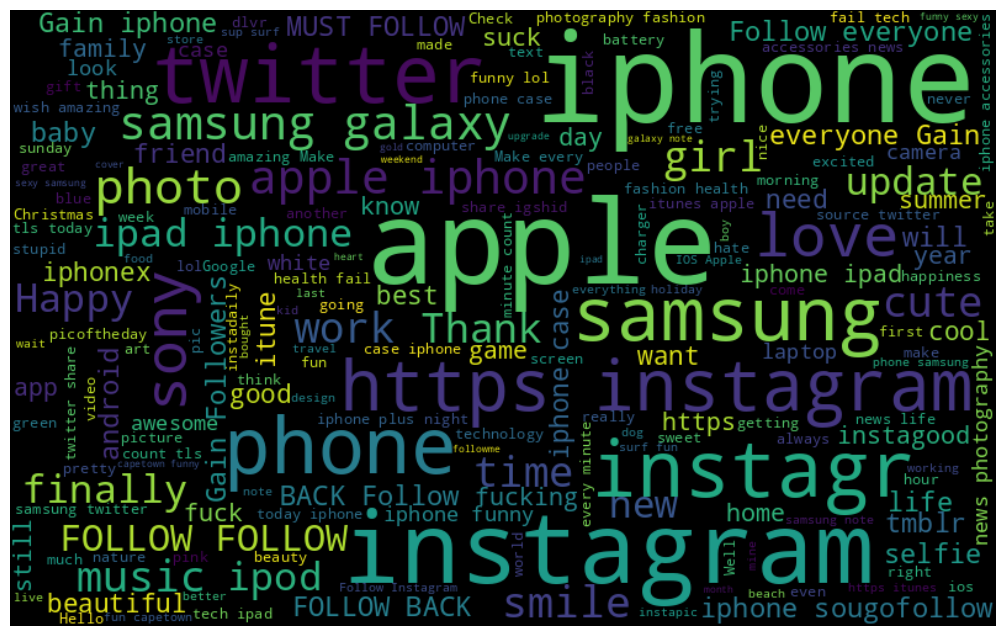

In [82]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

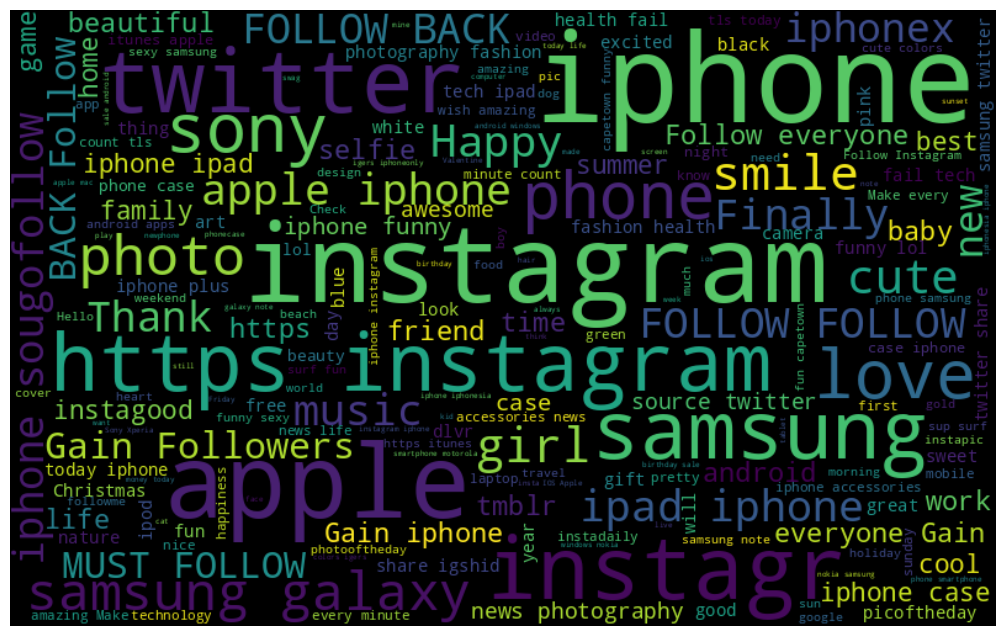

In [83]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

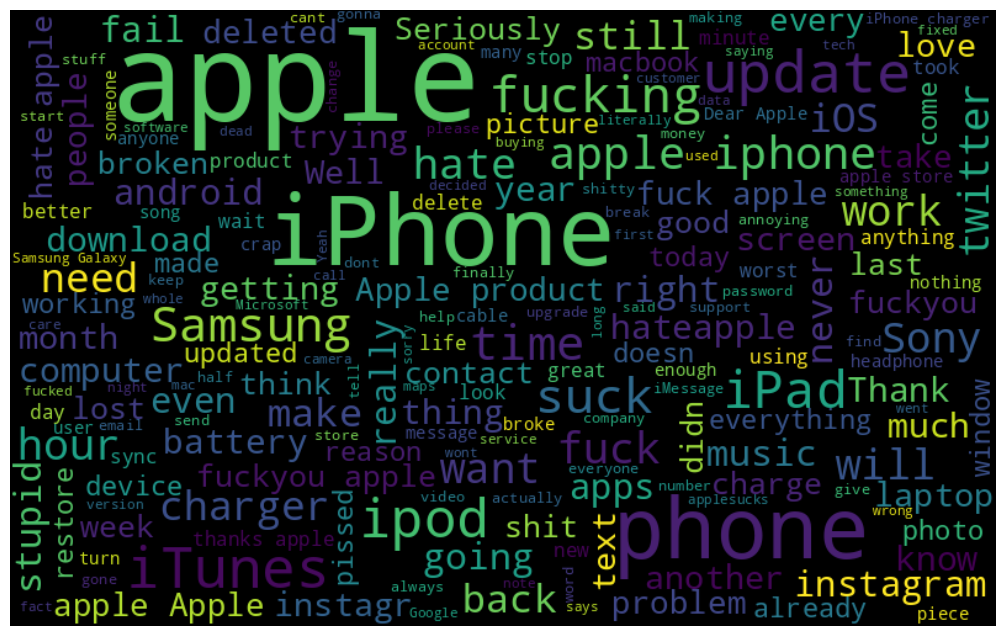

In [84]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [85]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [87]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

In [86]:
# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [88]:
ht_positive[:5]

[['fingerprint',
  'Pregnancy',
  'android',
  'apps',
  'beautiful',
  'cute',
  'health',
  'igers',
  'iphoneonly',
  'iphonesia',
  'iphone'],
 ['yay', 'Sony', 'Xperia', 'sonyexperias'],
 ['talk',
  'makememories',
  'unplug',
  'relax',
  'iphone',
  'smartphone',
  'wifi',
  'connect'],
 ['iphone', 'cute', 'daventry', 'home'],
 ['instapic', 'instadaily', 'sony', 'xperia', 'xperiaZ']]

In [89]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [90]:
ht_positive[:5]

['fingerprint', 'Pregnancy', 'android', 'apps', 'beautiful']

In [91]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,fingerprint,4
1,Pregnancy,1
2,android,249
3,apps,102
4,beautiful,199


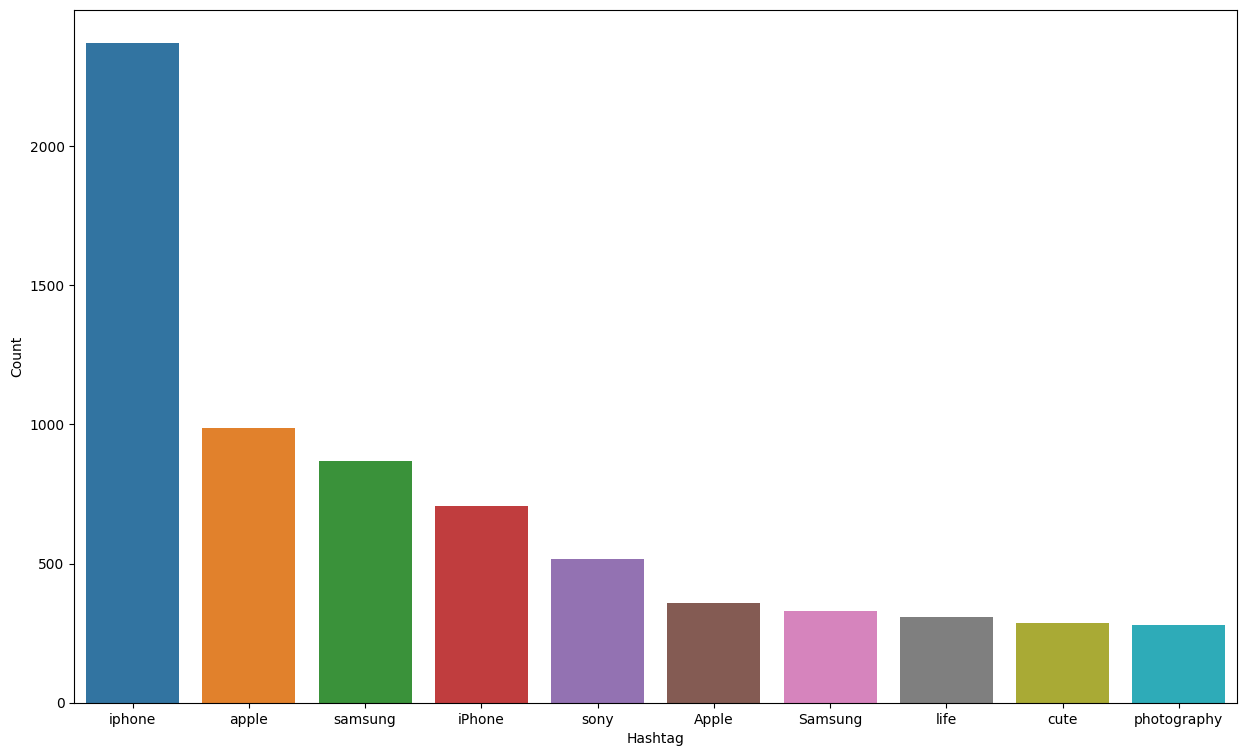

In [92]:

# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [93]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,apple,491
1,drinkyourhaterade,1
2,Cellcom,1
3,depressing,1
4,IDontWantTo,1


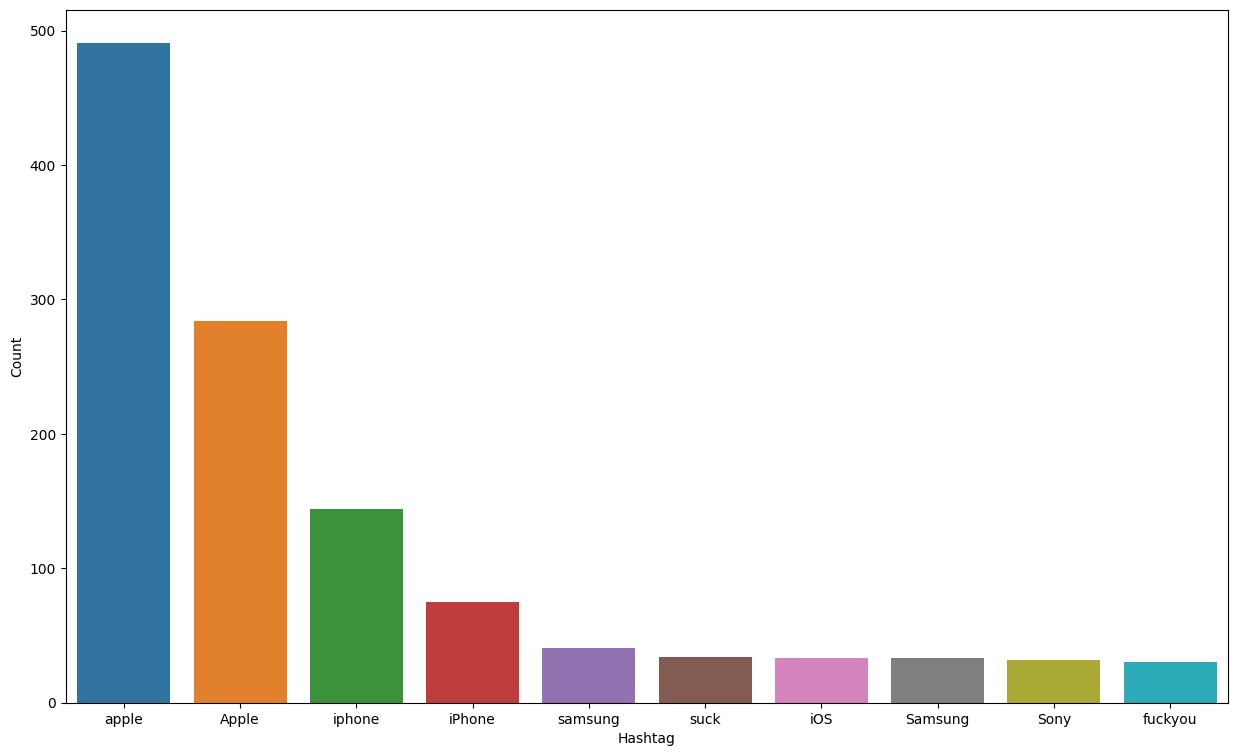

In [94]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

**Input Split**

In [95]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [96]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

**Model Training**

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [98]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [99]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.7904849039341263

In [100]:
accuracy_score(y_test,pred)

0.8843434343434343

In [101]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.8059701492537313

In [102]:
accuracy_score(y_test,pred)

0.8818181818181818

In [103]:
pred_prob[0][1] >= 0.3

False